In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv('C:\\Users\\pulat\\Downloads\\archive\\Mall_Customers.csv')


In [11]:
print("Data Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.7

In [12]:
# Step 4: Feature Selection
X = data.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score for clustering

# Step 5: Train/Test Split (if necessary)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_train = kmeans.fit_predict(X_train)
y_test = kmeans.predict(X_test)

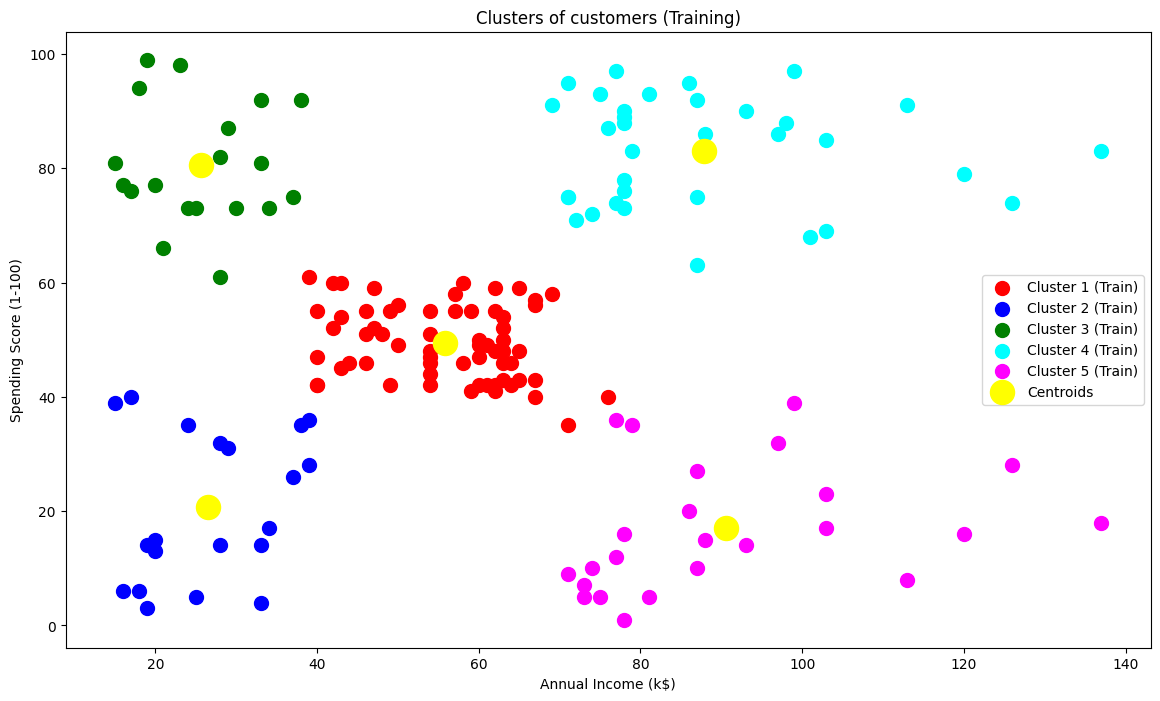

In [14]:
plt.figure(figsize=(14, 8))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], s=100, c='red', label='Cluster 1 (Train)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], s=100, c='blue', label='Cluster 2 (Train)')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], s=100, c='green', label='Cluster 3 (Train)')
plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], s=100, c='cyan', label='Cluster 4 (Train)')
plt.scatter(X_train[y_train == 4, 0], X_train[y_train == 4, 1], s=100, c='magenta', label='Cluster 5 (Train)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers (Training)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

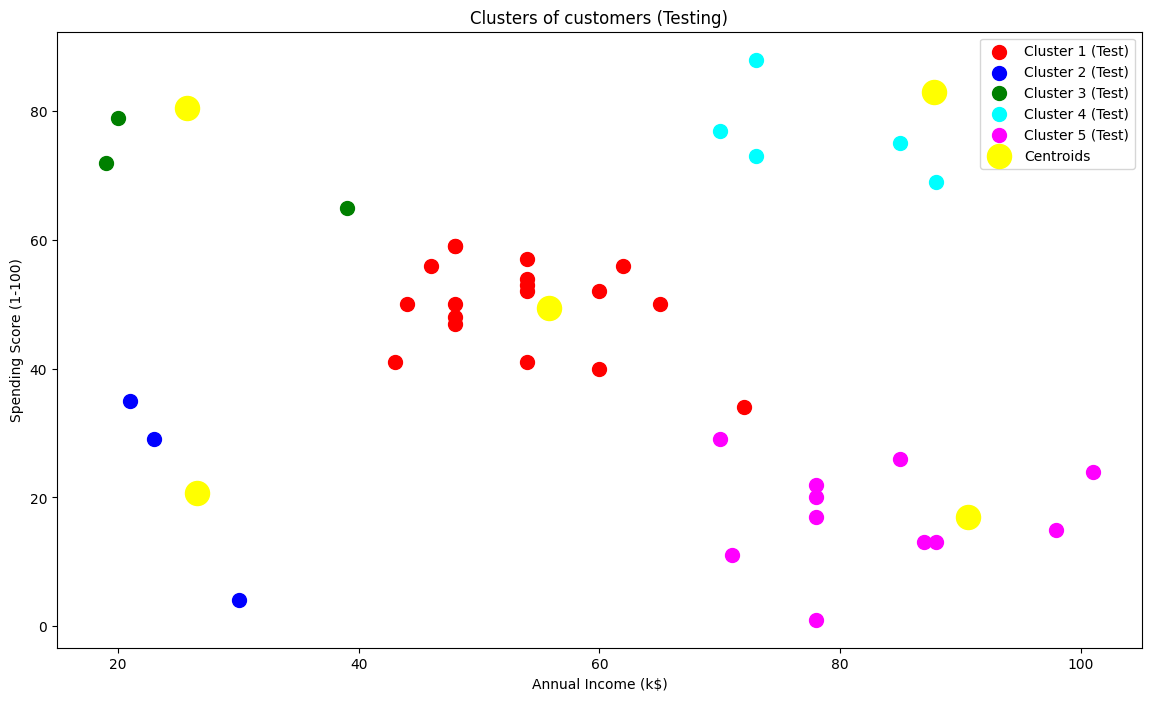

In [15]:
plt.figure(figsize=(14, 8))
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=100, c='red', label='Cluster 1 (Test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=100, c='blue', label='Cluster 2 (Test)')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], s=100, c='green', label='Cluster 3 (Test)')
plt.scatter(X_test[y_test == 3, 0], X_test[y_test == 3, 1], s=100, c='cyan', label='Cluster 4 (Test)')
plt.scatter(X_test[y_test == 4, 0], X_test[y_test == 4, 1], s=100, c='magenta', label='Cluster 5 (Test)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers (Testing)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

# Fit K-means model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.553931997444648


Silhouette Score: 0.553931997444648


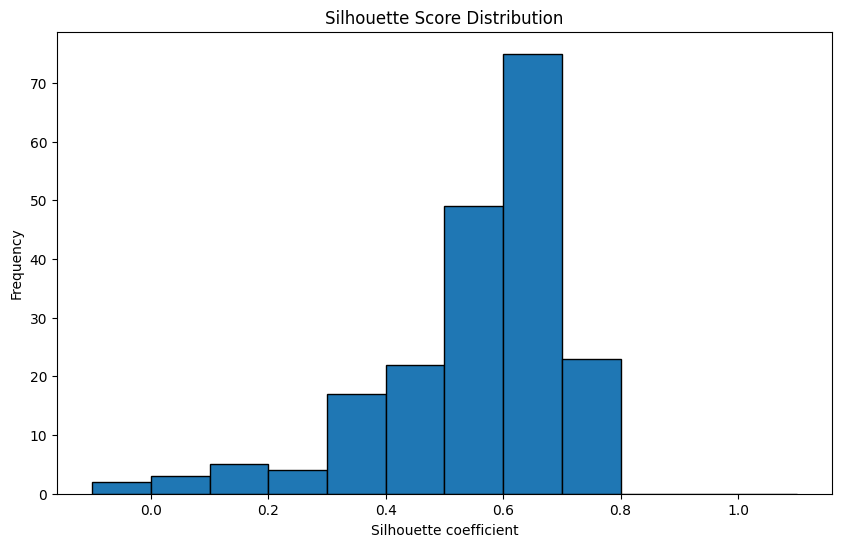

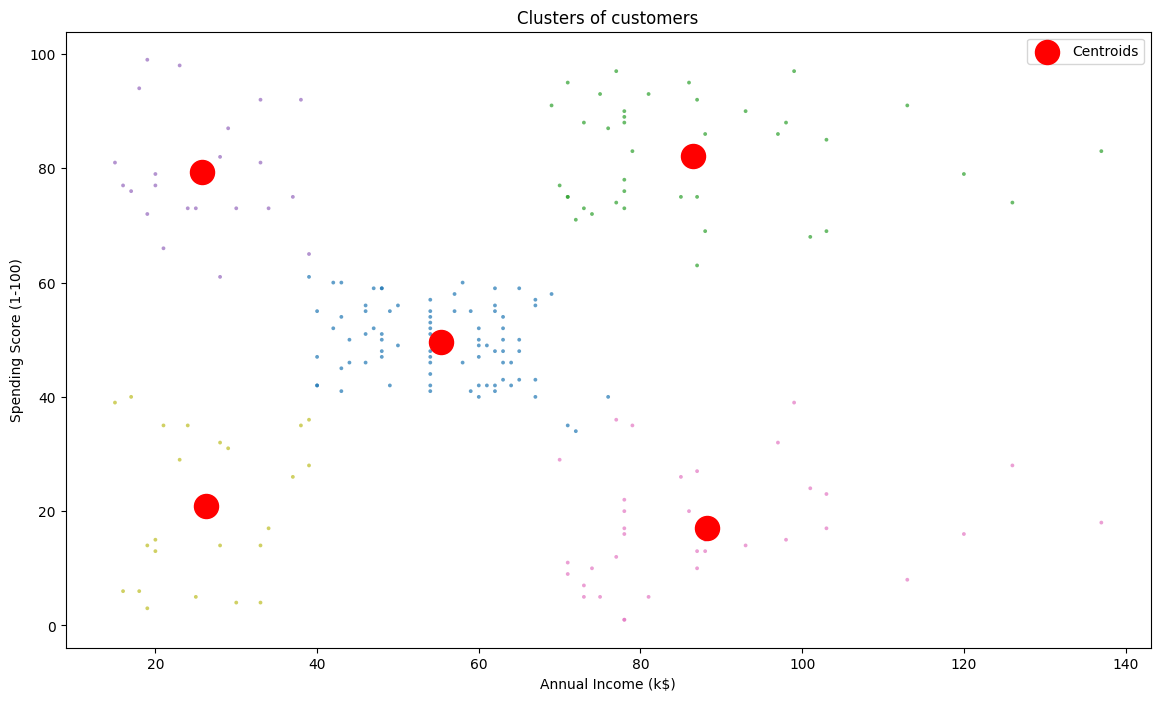

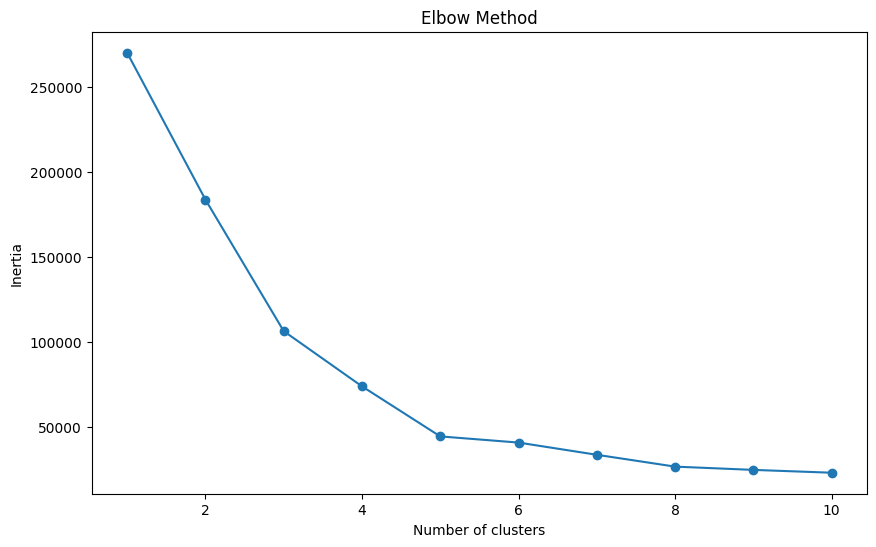

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Fit K-means model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, y_kmeans)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.hist(sample_silhouette_values, bins=np.arange(-0.1, 1.1, 0.1), edgecolor='black')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Frequency')
plt.title('Silhouette Score Distribution')
plt.show()

# Plot clusters with centroids
plt.figure(figsize=(14, 8))
colors = plt.cm.tab10(y_kmeans.astype(float) / kmeans.n_clusters)
plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
# Plot inertia for different numbers of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


ELBOW METHOD

In [20]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Fit K-means model
inertias = []
silhouette_avgs = []
cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    # Calculate inertia
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, y_kmeans)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette score is: 0.39564531743995546
For n_clusters = 3, the average silhouette score is: 0.46761358158775435
For n_clusters = 4, the average silhouette score is: 0.4937945814354117
For n_clusters = 5, the average silhouette score is: 0.553931997444648
For n_clusters = 6, the average silhouette score is: 0.5128405328004378
For n_clusters = 7, the average silhouette score is: 0.5017174409749505
For n_clusters = 8, the average silhouette score is: 0.4962769338093321
For n_clusters = 9, the average silhouette score is: 0.45587414130065596
For n_clusters = 10, the average silhouette score is: 0.4426214845978157


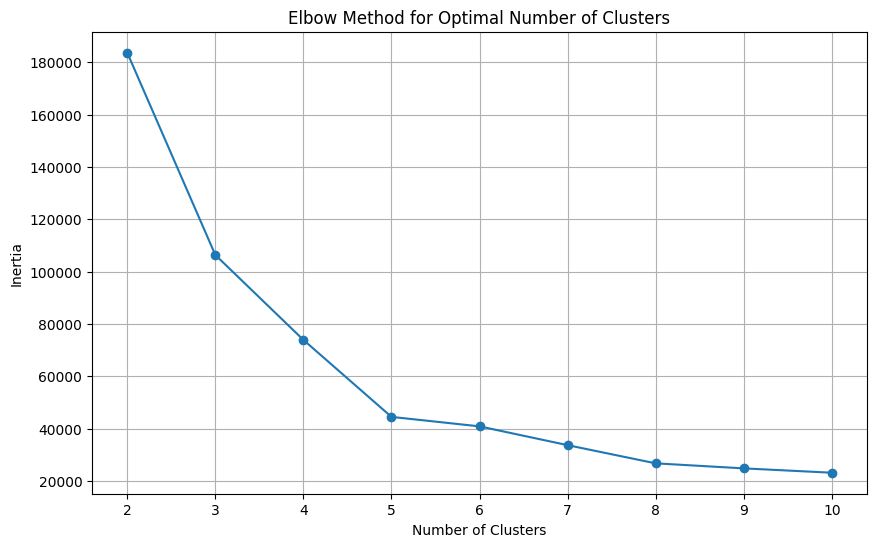

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

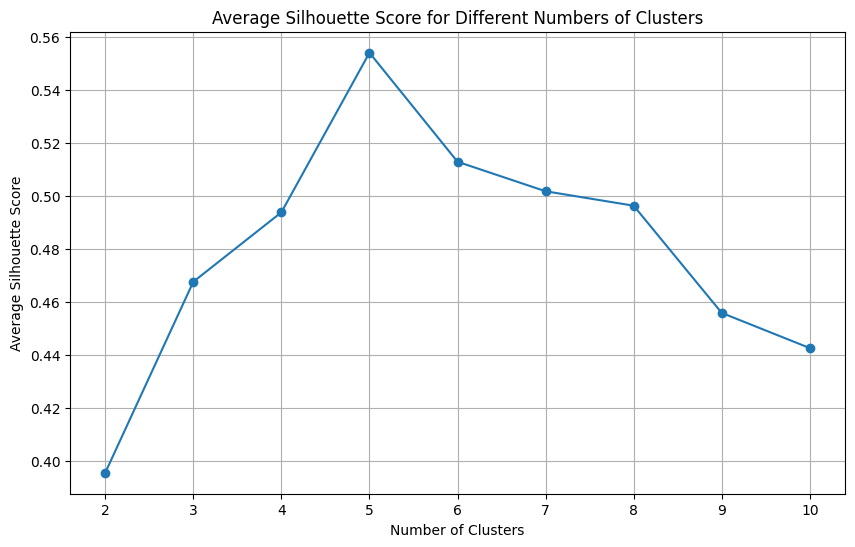

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_avgs, marker='o')
plt.title('Average Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

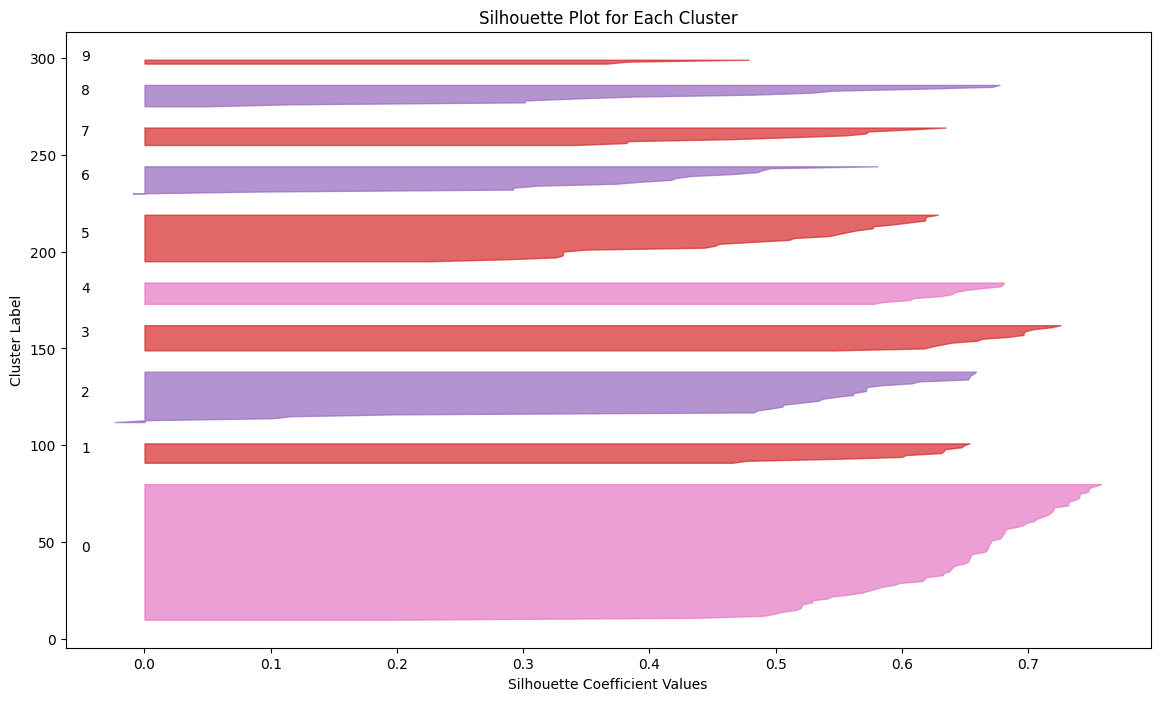

In [25]:
# Silhouette analysis for each cluster
plt.figure(figsize=(14, 8))
colors = plt.cm.tab10(y_kmeans.astype(float) / kmeans.n_clusters)
y_lower = 10  # Initialize y_lower

for i in range(kmeans.n_clusters):
    cluster_silhouette_values = sample_silhouette_values[y_kmeans == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title('Silhouette Plot for Each Cluster')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.show()
